# Introduction to Machine Learning

---

**Contents:**
  - Read the Dataset
    - Check Percentage Target Class
    - Check Missing Values
    - Check Categorical Attributes
    - Logistic Regression for Classification
    - Logistic Regression Single Input


In [ ]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, roc_auc_score 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.metrics import sensitivity_specificity_support
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostRegressor
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

## Read the Dataset 

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/healthcare-dataset-stroke-data.csv', delimiter = ",")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#untuk melihat statistical details
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Check Percentage Target Class

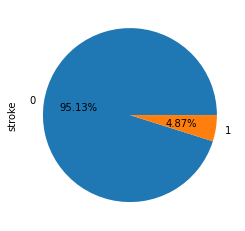

In [ ]:
data = df['stroke'].value_counts()
data.plot(kind='pie',autopct='%.2f%%')
plt.show() 

In [ ]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

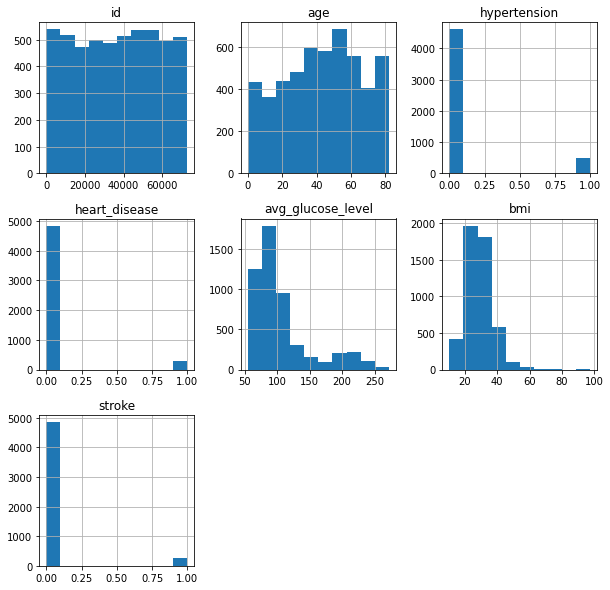

In [ ]:
# check histogram for continuous columns
df.hist(figsize=(10,10))
plt.show()

In [ ]:
#check correlation coef
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


### Check Missing Values

In [ ]:
df.isnull().sum()

#nilai bmi ada yg kosong

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Check Categorical Attributes

In [ ]:
df_X = df.drop(['id',	'stroke'],axis=1)
df_Y = df[['stroke']]

cats = df_X.select_dtypes(include=['object', 'bool']).columns
print(cats)

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [ ]:
df_X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


In [ ]:
df_Y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


### Logistic Regression for Classification

Accuracy  0.9458577951728636
Precision  0.4729288975864318
Recall  0.5
Confusion matrix  [[1450    0]
 [  83    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


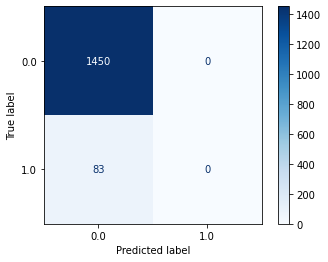

In [ ]:
# data preprocessing dimulai
# membuat X and y. X untuk input variable, y untuk target class
df_X = df.drop(['id',	'stroke'],axis=1)
df_y = df[['stroke']]

#label encoding for y. 
#merubah nilai yg ada di y menjadi 0 atau 1.
#sebenarnya ini tidak diperlukan karena nilai y di dataset sudah 0 atau 1
le = LabelEncoder()
df_y= le.fit_transform(df_y['stroke'])

#imputation. kita isi nilai kosong yg di kolom bmi dengan nilai median nya (atau bisa pakai cara lain)
df_X['bmi'].fillna(df_X['bmi'].median(), inplace=True)

#categorical encoding
#merubah categorical value menjadi numerical value
#bisa pakai label encoding, ordinal atau one hot encoding
cats = df_X.select_dtypes(include=['object', 'bool']).columns
cat_features = list(cats.values)
le = LabelEncoder()
for i in cat_features:
  df_X[i] = le.fit_transform(df_X[i])

#menyimpan X dan y menjadi numpy arrays
X = df_X.astype(float).values
y = df_y.astype(float)

#hold-out method, dibagi menjadi training dan testing set. 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#scaling
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# data preprocessing selesai

#mulai melakukan modelling. model ML learning dari training set 
model=LogisticRegression()
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [ ]:
X

array([[  1.  ,  67.  ,   0.  , ..., 228.69,  36.6 ,   1.  ],
       [  0.  ,  61.  ,   0.  , ..., 202.21,  28.1 ,   2.  ],
       [  1.  ,  80.  ,   0.  , ..., 105.92,  32.5 ,   2.  ],
       ...,
       [  0.  ,  35.  ,   0.  , ...,  82.99,  30.6 ,   2.  ],
       [  1.  ,  51.  ,   0.  , ..., 166.29,  25.6 ,   1.  ],
       [  0.  ,  44.  ,   0.  , ...,  85.28,  26.2 ,   0.  ]])

In [ ]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [ ]:
X_train

array([[ 1.17402064,  0.60884288, -0.33037446, ...,  0.63825752,
         0.01830386, -1.28066776],
       [-0.85177378, -1.88698872, -0.33037446, ..., -0.38666334,
        -1.76113545, -1.28066776],
       [ 1.17402064, -1.03666263, -0.33037446, ..., -0.46619632,
        -1.10692982,  0.58720118],
       ...,
       [-0.85177378, -0.54745829, -0.33037446, ..., -0.64701301,
         0.86877117,  0.58720118],
       [-0.85177378,  0.07516542, -0.33037446, ...,  2.46927368,
         3.40708901,  1.52113566],
       [-0.85177378,  1.09804722, -0.33037446, ...,  2.31460181,
         1.35288334, -1.28066776]])

In [ ]:
X_test

array([[-0.85177378, -0.05825395, -0.33037446, ...,  0.15974141,
         1.07811697, -0.34673329],
       [-0.85177378,  1.54277844, -0.33037446, ..., -0.60241303,
         0.14914498, -0.34673329],
       [ 1.17402064, -0.68087765, -0.33037446, ..., -0.71270462,
        -0.46580831,  1.52113566],
       ...,
       [-0.85177378,  0.83120849, -0.33037446, ..., -0.30515302,
        -1.22468683, -1.28066776],
       [-0.85177378,  1.67619781, -0.33037446, ..., -0.74258441,
        -1.27702328, -1.28066776],
       [-0.85177378, -0.19167331, -0.33037446, ..., -0.60351155,
        -0.0471167 , -1.28066776]])

In [ ]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
y_test

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
model.coef_

array([[-0.09426235,  1.51486262,  0.11620765,  0.08162857, -0.22239137,
        -0.02613281,  0.08658284,  0.13254052,  0.00440642, -0.0525763 ]])

In [ ]:
model.intercept_

array([-3.90758698])

## Contoh Sederhana dengan menggunakan Single Input Variable

In [ ]:
#baca dataset dari pima diabetes
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/diabetes.csv', delimiter = ",")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


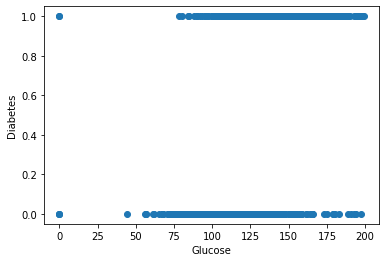

In [ ]:
## lihat sebaran data berdasarkan class-nya
import matplotlib.pyplot as plt

plt.scatter(df['Glucose'],df['Outcome'])
plt.xlabel('Glucose')
plt.ylabel('Diabetes') 
plt.show()

Accuracy  0.7229437229437229
Precision  0.6932143538843291
Recall  0.667591059602649
Confusion matrix  [[128  23]
 [ 41  39]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


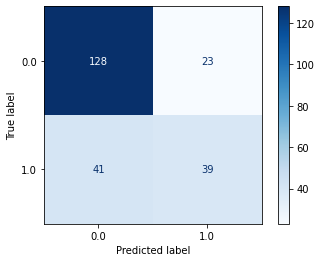

In [ ]:
X = df['Glucose'].astype(float).values
y = df['Outcome'].astype(float)
X=X.reshape(-1, 1)
#hold out, dibagi menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#mulai melakukan modelling. model ML learning dari training set 
model=LogisticRegression()
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [ ]:
model.coef_

array([[0.04033676]])

In [ ]:
model.intercept_

array([-5.6523997])

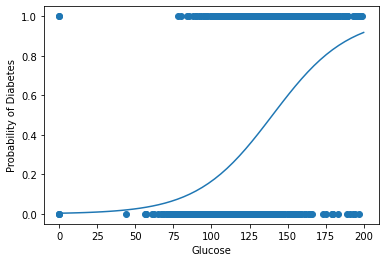

In [ ]:
x = np.linspace(0, 200)
#logistic function
#masukkan coefficient dan intercept yg dihasilkan model LR diatas
p = 1/(1 + np.exp
       (-(0.04033676*x -5.6523997)))
plt.scatter(df['Glucose'],df['Outcome'])
plt.plot(x,p)
plt.xlabel('Glucose')
plt.ylabel('Probability of Diabetes') 
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


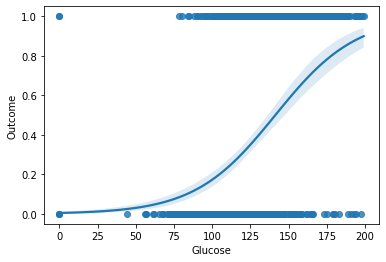

In [ ]:
#bisa pakai cara simple menggunakan seaborn
import seaborn as sns
sns.regplot(x='Glucose', y='Outcome',data=df, logistic=True)

In [ ]:
# misalkan blood glucose/gula darah patient adalah 190 mg/dL.
# apakah diprediksi diabetes atau tidak?
# masukkan 190 sebagai x nya
# hasil output adalah probabilitas patient terkena diabetes, diatas 0.5 berarti diabetes = yes
p = 1/(1 + np.exp
       (-(0.04033676*190 -5.6523997)))
print(p)

0.8820080415547628


# Data Preprocessing 


---

**Contents**
  - Reading the Dataset
    - Checking Percentage of Target Class
    - Checking Missing Values
    - Duplicates
    - Imputation
    - Checking Categorical Attributes
    - One-Hot Encoding untuk Input Features
    - Label Encoding untuk Input Features
    - Label Encoding untuk Target Class
    - Correlation Coefficient
    - Train-Test Split
    - Standardization
    - Normalization
    - MLP for Binary Classification
  - Imbalanced Dataset




## Reading the Dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/train.csv', delimiter=',')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# Data Shape
df.shape

(891, 12)

### Checking Percentage of Target Class

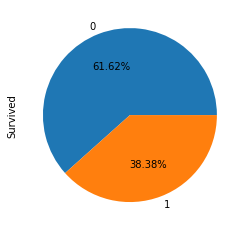

In [ ]:
data = df['Survived'].value_counts()
data.plot(kind='pie',autopct='%.2f%%')
plt.show() 

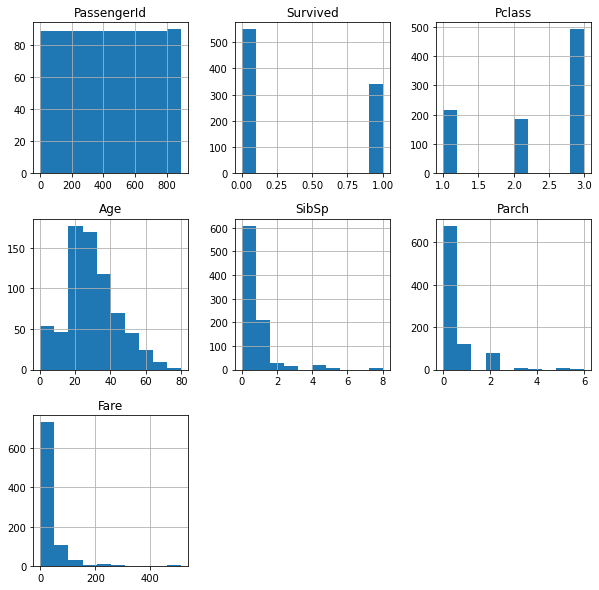

In [ ]:
df.hist(figsize=(10,10))
plt.show()

### Checking Missing Values

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Missing Value Check
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Duplicates

In [ ]:
# Duplicate check
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(inplace=True)

### Imputation

In [ ]:
#imputation. kita isi nilai kosong
# kolom numerik
df['Age'].fillna(df['Age'].median(), inplace=True)
#df['Age'].fillna(df['Age'].mean(), inplace=True)

# kolom kategori
df['Cabin'].fillna(df['Cabin'].value_counts().index[0], inplace=True)
df['Embarked'].fillna(df['Embarked'].value_counts().index[0], inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
df['Embarked'].value_counts().index[0]

'S'

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Checking Categorical Attributes

In [ ]:
# get X and y
df_X = df.drop(['PassengerId','Name',	'Survived','Cabin','Ticket'],axis=1)
df_y = df[['Survived']]

#check categorical attributes
cats = df_X.select_dtypes(include=['object', 'bool']).columns
print(cats)

Index(['Sex', 'Embarked'], dtype='object')


In [ ]:
df_X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [ ]:
df_y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


### One-Hot Encoding untuk Input Features

In [ ]:
# One Hot Encode
df_onehot = pd.get_dummies(df_X, columns=['Sex', 'Embarked'], drop_first=True)
df_onehot.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


### Label Encoding untuk Input Features

In [ ]:
#categorical encoding
cats = df_X.select_dtypes(include=['object', 'bool']).columns
cat_features = list(cats.values)
cat_en = LabelEncoder()
for i in cat_features:
  df_X[i] = cat_en.fit_transform(df_X[i])

df_X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


### Label Encoding untuk Target Class

In [ ]:
#label encoding for y
le = LabelEncoder()
le.fit(df_y)
df_y= le.fit_transform(df_y)
df_y

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

### Correlation Coefficient

In [ ]:
df_y_new = pd.DataFrame(df_y,columns=['Survived'])
df_gabung = pd.concat([df_X, df_y_new], axis=1)
df_gabung.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
Pclass,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.162098,-0.338481
Sex,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.108262,-0.543351
Age,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.018754,-0.064910
SibSp,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.068230,-0.035322
Parch,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.039798,0.081629
Fare,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.224719,0.257307
Embarked,0.162098,0.108262,-0.018754,0.068230,0.039798,-0.224719,1.000000,-0.167675
Survived,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.167675,1.000000


### Train-Test Split

In [ ]:
#hold out, dibagi menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)

In [ ]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
445,1,1,4.0,0,2,81.8583,2
650,3,1,28.0,0,0,7.8958,2
172,3,0,1.0,1,1,11.1333,2
450,2,1,36.0,1,2,27.7500,2
314,2,1,43.0,1,1,26.2500,2
...,...,...,...,...,...,...,...
106,3,0,21.0,0,0,7.6500,2
270,1,1,28.0,0,0,31.0000,2
860,3,1,41.0,2,0,14.1083,2
435,1,0,14.0,1,2,120.0000,2


### Standardization

In [ ]:
#scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-1.63788124,  0.72077194, -1.91971935, ...,  1.99885349,
         0.98099823,  0.57000481],
       [ 0.80326712,  0.72077194, -0.0772525 , ..., -0.47932706,
        -0.46963364,  0.57000481],
       [ 0.80326712, -1.38740139, -2.15002771, ...,  0.75976322,
        -0.40613632,  0.57000481],
       ...,
       [ 0.80326712,  0.72077194,  0.92075038, ..., -0.47932706,
        -0.34778742,  0.57000481],
       [-1.63788124, -1.38740139, -1.15202483, ...,  1.99885349,
         1.72907416,  0.57000481],
       [-1.63788124,  0.72077194, -0.61463866, ...,  0.75976322,
         0.8913508 ,  0.57000481]])

### Normalization

In [ ]:
#scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[0.        , 1.        , 0.04498618, ..., 0.33333333, 0.15977676,
        1.        ],
       [1.        , 1.        , 0.34656949, ..., 0.        , 0.01541158,
        1.        ],
       [1.        , 0.        , 0.00728826, ..., 0.16666667, 0.02173075,
        1.        ],
       ...,
       [1.        , 1.        , 0.50992712, ..., 0.        , 0.02753757,
        1.        ],
       [0.        , 0.        , 0.17064589, ..., 0.33333333, 0.2342244 ,
        1.        ],
       [0.        , 1.        , 0.25860769, ..., 0.16666667, 0.15085515,
        1.        ]])

### MLP for Binary classification

Accuracy  0.8283582089552238
Precision  0.8400965263224742
Recall  0.8073104952085843
Confusion matrix  [[146  11]
 [ 35  76]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


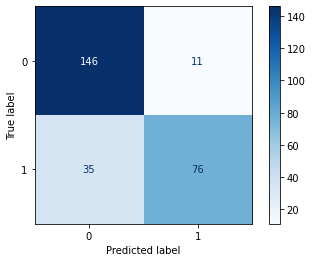

In [ ]:
#mulai learning 
model=MLPClassifier(max_iter=1000)

#model=MLPClassifier(max_iter=1000, random_state=42, activation='logistic')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

## Imbalanced Dataset

In [ ]:
under_sampling = RandomUnderSampler(random_state=0)

X_resampled, y_resampled = under_sampling.fit_resample(X_train, y_train)

print('sebelum undersampling')
print(pd.DataFrame(y_train).value_counts())
print('setelah undersampling')
print(pd.DataFrame(y_resampled).value_counts())

sebelum undersampling
0    392
1    231
dtype: int64
setelah undersampling
0    231
1    231
dtype: int64


# Advanced Data Preprocessing for ML

---

**Contents**
  - Imbalanced Dataset
    - Reading the Dataset
    - Random Under Sampling
    - SMOTE
    - ADASYN
  - Read the Dataset
    - Resize Dataset
    - Remove Neutral
    - Tokenization
    - Tokenization, Removing Stopwords, Stemming
    - Removing Stopword + Lemmatization
  - Feature Extraction
    - Bag of Words
    - Airline Dataset
    - TF-IDF
    - Airline Dataset
  - Classification Models
    - MLP + BOW
    - MLP + TFIDF
  - Word Cloud
  - Future works



## Imbalanced Dataset

In [ ]:
df_3 = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/healthcare-dataset-stroke-data.csv', delimiter=',')
df_3.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


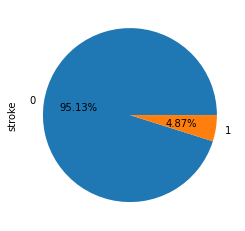

In [ ]:
data = df_3['stroke'].value_counts()
data.plot(kind='pie',autopct='%.2f%%')
plt.show()

In [ ]:
df_3.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Random Under Sampling

In [ ]:
under_sampling = RandomUnderSampler(random_state=0)
df_X = df_3.drop(['id', 'stroke'], axis=1)
df_y = df_3['stroke']

#imputation
df_X['bmi'].fillna(df_X['bmi'].mean(), inplace=True)

#categorical encoding
le = LabelEncoder()
df_X['gender'] = le.fit_transform(df_X['gender'])
df_X['ever_married'] = le.fit_transform(df_X['ever_married'])
df_X['work_type'] = le.fit_transform(df_X['work_type'])
df_X['Residence_type'] = le.fit_transform(df_X['Residence_type'])
df_X['smoking_status'] = le.fit_transform(df_X['smoking_status'])

X = df_X.astype(float).values
y = df_y.astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

X_resampled, y_resampled = under_sampling.fit_resample(X_train, y_train)

print('sebelum undersampling')
print(pd.DataFrame(y_train).value_counts())
print('setelah undersampling')
print(pd.DataFrame(y_resampled).value_counts())

sebelum undersampling
0.0    3663
1.0     169
dtype: int64
setelah undersampling
0.0    169
1.0    169
dtype: int64


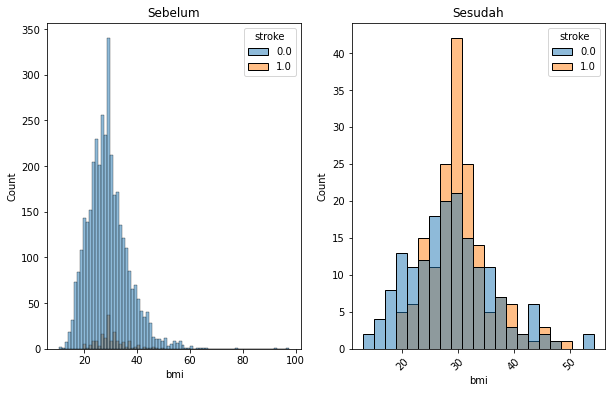

In [ ]:
dfx_ori= pd.DataFrame(X_train, columns=df_X.columns)
dfy_ori = pd.DataFrame(y_train, columns=['stroke'])
df_sebelum = pd.concat([dfx_ori, dfy_ori], axis=1)

dfx_res = pd.DataFrame(X_resampled, columns=df_X.columns)
dfy_res = pd.DataFrame(y_resampled, columns=['stroke'])
df_sesudah = pd.concat([dfx_res, dfy_res], axis=1)

f, axes = plt.subplots(1,2, figsize=(10, 6))
sns.histplot(data=df_sebelum, x='bmi',hue='stroke', ax=axes[0]).set(title='Sebelum') 
sns.histplot(data=df_sesudah, x='bmi',hue='stroke', ax=axes[1]).set(title='Sesudah') 
plt.xticks(rotation='45')                                  
plt.show()

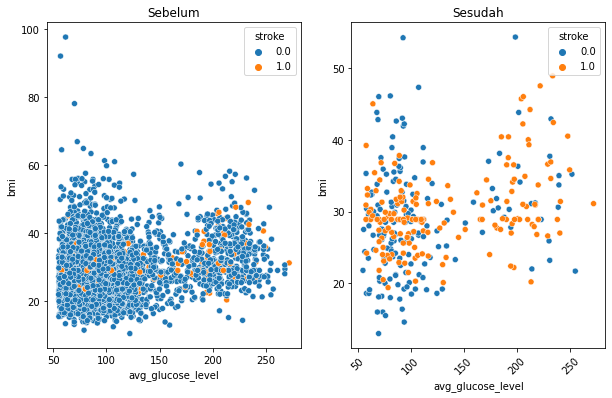

In [ ]:
f, axes = plt.subplots(1,2, figsize=(10, 6))
sns.scatterplot(x='avg_glucose_level', y='bmi', data=df_sebelum, hue='stroke', ax=axes[0]).set(title='Sebelum') 
sns.scatterplot(x='avg_glucose_level', y='bmi', data=df_sesudah, hue='stroke', ax=axes[1]).set(title='Sesudah') 
plt.xticks(rotation='45')                                  
plt.show()

### Random Over Sampling

In [ ]:
over_sampling = RandomOverSampler(random_state=0)
df_X = df_3.drop(['id', 'stroke'], axis=1)
df_y = df_3['stroke']
#imputation
df_X['bmi'].fillna(df_X['bmi'].mean(), inplace=True)

#categorical encoding
le = LabelEncoder()
df_X['gender'] = le.fit_transform(df_X['gender'])
df_X['ever_married'] = le.fit_transform(df_X['ever_married'])
df_X['work_type'] = le.fit_transform(df_X['work_type'])
df_X['Residence_type'] = le.fit_transform(df_X['Residence_type'])
df_X['smoking_status'] = le.fit_transform(df_X['smoking_status'])

X = df_X.astype(float).values
y = df_y.astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

X_resampled, y_resampled = over_sampling.fit_resample(X_train, y_train)

print('sebelum random oversampling')
print(pd.DataFrame(y_train).value_counts())
print('setelah random oversampling')
print(pd.DataFrame(y_resampled).value_counts())

sebelum random oversampling
0.0    3663
1.0     169
dtype: int64
setelah random oversampling
0.0    3663
1.0    3663
dtype: int64


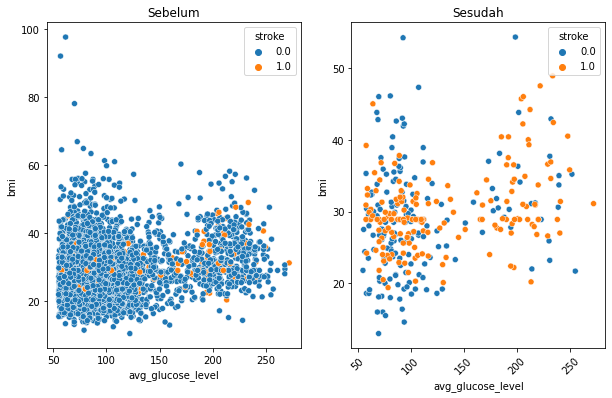

In [ ]:
f, axes = plt.subplots(1,2, figsize=(10, 6))
sns.scatterplot(x='avg_glucose_level', y='bmi', data=df_sebelum, hue='stroke', ax=axes[0]).set(title='Sebelum') 
sns.scatterplot(x='avg_glucose_level', y='bmi', data=df_sesudah, hue='stroke', ax=axes[1]).set(title='Sesudah') 
plt.xticks(rotation='45')                                  
plt.show()

### SMOTE

In [ ]:
df_X = df_3.drop(['id','stroke'],axis=1)
df_y = df_3['stroke']
#imputation
df_X['bmi'].fillna(df_X['bmi'].mean(), inplace=True)
#categorical encoding
le = LabelEncoder()
df_X['gender'] = le.fit_transform(df_X['gender'])
df_X['ever_married'] = le.fit_transform(df_X['ever_married'])
df_X['work_type'] = le.fit_transform(df_X['work_type'])
df_X['Residence_type'] = le.fit_transform(df_X['Residence_type'])
df_X['smoking_status'] = le.fit_transform(df_X['smoking_status'])

X = df_X.astype(float).values
y = df_y.astype(float).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print('Sebelum SMOTE')
print(pd.DataFrame(y_train).value_counts())
print('Setelah SMOTE')
print(pd.DataFrame(y_resampled).value_counts())

Sebelum SMOTE
0.0    3663
1.0     169
dtype: int64
Setelah SMOTE
0.0    3663
1.0    3663
dtype: int64


### ADASYN

In [ ]:
df_X = df_3.drop(['id','stroke'],axis=1)
df_y = df_3['stroke']
#imputation
df_X['bmi'].fillna(df_X['bmi'].mean(), inplace=True)
#categorical encoding
le = LabelEncoder()
df_X['gender'] = le.fit_transform(df_X['gender'])
df_X['ever_married'] = le.fit_transform(df_X['ever_married'])
df_X['work_type'] = le.fit_transform(df_X['work_type'])
df_X['Residence_type'] = le.fit_transform(df_X['Residence_type'])
df_X['smoking_status'] = le.fit_transform(df_X['smoking_status'])

X = df_X.astype(float).values
y = df_y.astype(float).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
adasyn = ADASYN(random_state=0)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)
print('Sebelum ADASYN')
print(pd.DataFrame(y_train).value_counts())
print('Setelah ADASYIN')
print(pd.DataFrame(y_resampled).value_counts())

Sebelum ADASYN
0.0    3663
1.0     169
dtype: int64
Setelah ADASYIN
1.0    3676
0.0    3663
dtype: int64


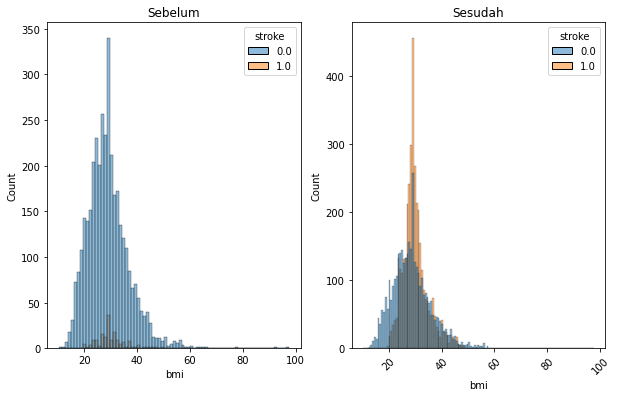

In [ ]:
dfx_ori= pd.DataFrame(X_train, columns=df_X.columns)
dfy_ori = pd.DataFrame(y_train, columns=['stroke'])
df_sebelum = pd.concat([dfx_ori, dfy_ori], axis=1)

dfx_res = pd.DataFrame(X_resampled, columns=df_X.columns)
dfy_res = pd.DataFrame(y_resampled, columns=['stroke'])
df_sesudah = pd.concat([dfx_res, dfy_res], axis=1)

f, axes = plt.subplots(1,2, figsize=(10, 6))
sns.histplot(data=df_sebelum, x='bmi',hue='stroke', ax=axes[0]).set(title='Sebelum') 
sns.histplot(data=df_sesudah, x='bmi',hue='stroke', ax=axes[1]).set(title='Sesudah') 
plt.xticks(rotation='45')                                  
plt.show()

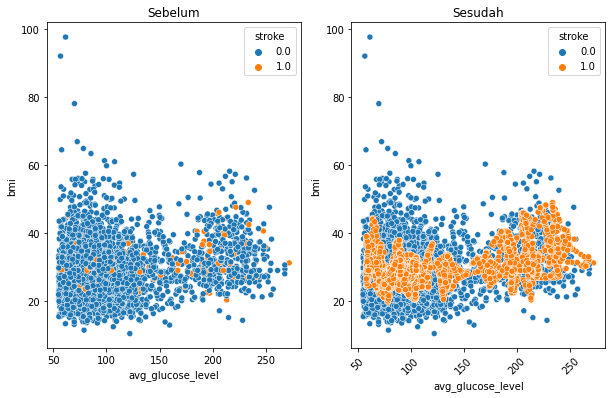

In [ ]:
f, axes = plt.subplots(1,2, figsize=(10, 6))
sns.scatterplot(x='avg_glucose_level', y='bmi', data=df_sebelum, hue='stroke', ax=axes[0]).set(title='Sebelum') 
sns.scatterplot(x='avg_glucose_level', y='bmi', data=df_sesudah, hue='stroke', ax=axes[1]).set(title='Sesudah') 
plt.xticks(rotation='45')                                  
plt.show()

## Reading the Dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/Tweets.csv', delimiter=',')
#df = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/IMDB_small_size.csv', delimiter=',')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### Resize Dataset

In [ ]:
df_resize = df.iloc[:1000]
df_resize.shape

(1000, 15)

### Remove Neutral

In [ ]:
df_resize = df_resize[df_resize.airline_sentiment	 != 'neutral']

In [ ]:
df_resize.shape

(728, 15)

In [ ]:
df_resize.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)


### Tokenization

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

df_text = df_resize['text'].astype(str)
df_class = df_resize['airline_sentiment']
lines = df_text.values.tolist()

list_tokens = list()
for line in lines:
  line = line.replace("@VirginAmerica","")
  line = line.replace("@united","")
  tokens = word_tokenize(line)
  list_tokens.append(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
list_tokens[0]

['plus',
 'you',
 "'ve",
 'added',
 'commercials',
 'to',
 'the',
 'experience',
 '...',
 'tacky',
 '.']

# Classification 1 

---

**Contents:**
- Reading the Dataset
  - Check Precentage Target Class
  - Check Missing Values
  - Check Categorical Attributes
- Data Pre-Processing
- Logistic Regression
- K-Nearest Neighbour 
- Decision Tree
- Random Forest
- AdaBoost
- Support Vector Machine (SVM)
- MLP for Binary Classification
  - One vs Rest
  - One vs One



## Reading the Dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/healthcare-dataset-stroke-data.csv', delimiter = ",")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
#untuk melihat statistical details
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Check Persentase Target Class

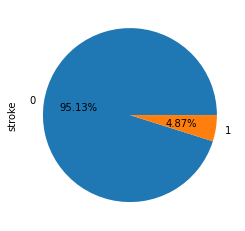

In [ ]:
data = df['stroke'].value_counts()
data.plot(kind='pie',autopct='%.2f%%')
plt.show() 

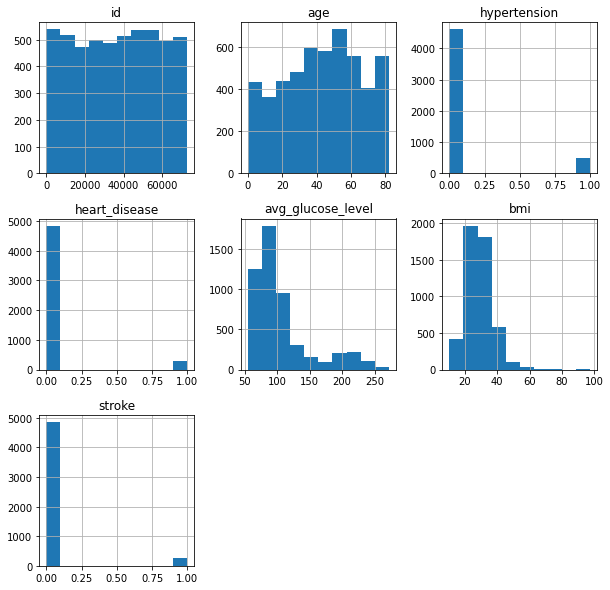

In [ ]:
# check histogram for continuous columns
df.hist(figsize=(10,10))
plt.show()

In [ ]:
#check correlation coef
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


### Check Missing Values

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Check Categorical Attributes

In [ ]:
df_X = df.drop(['id',	'stroke'],axis=1)
df_y = df[['stroke']]
cats = df_X.select_dtypes(include=['object', 'bool']).columns
print(cats)

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


## Data Pre Processing

In [ ]:
# data preprocessing dimulai

# membuat X and y. X untuk input variable, y untuk target class
df_X = df.drop(['id',	'stroke'],axis=1)
df_y = df[['stroke']]

#label encoding for y. 
#merubah nilai yg ada di y menjadi 0 atau 1.
#sebenarnya ini tidak diperlukan karena nilai y di dataset sudah 0 atau 1
le = LabelEncoder()
df_y= le.fit_transform(df_y['stroke'])

#imputation. kita isi nilai kosong yg di kolom bmi dengan nilai median nya (atau bisa pakai cara lain)
df_X['bmi'].fillna(df_X['bmi'].median(), inplace=True)

#categorical encoding
#merubah categorical value menjadi numerical value
#bisa pakai label encoding, ordinal atau one hot encoding
cats = df_X.select_dtypes(include=['object', 'bool']).columns
cat_features = list(cats.values)
le = LabelEncoder()
for i in cat_features:
  df_X[i] = le.fit_transform(df_X[i])

#menyimpan X dan y menjadi numpy arrays
X = df_X.astype(float).values
y = df_y.astype(float)

#hold-out method, dibagi menjadi training dan testing set. 70% training, 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#scaling
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# data preprocessing selesai

In [ ]:
X

array([[  1.  ,  67.  ,   0.  , ..., 228.69,  36.6 ,   1.  ],
       [  0.  ,  61.  ,   0.  , ..., 202.21,  28.1 ,   2.  ],
       [  1.  ,  80.  ,   0.  , ..., 105.92,  32.5 ,   2.  ],
       ...,
       [  0.  ,  35.  ,   0.  , ...,  82.99,  30.6 ,   2.  ],
       [  1.  ,  51.  ,   0.  , ..., 166.29,  25.6 ,   1.  ],
       [  0.  ,  44.  ,   0.  , ...,  85.28,  26.2 ,   0.  ]])

In [ ]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [ ]:
X_train

array([[ 1.18418048, -1.7467638 , -0.31719928, ..., -0.340693  ,
        -1.64591683, -1.29622579],
       [ 1.18418048, -0.63635252, -0.31719928, ...,  2.26654137,
        -0.78843307,  1.52066342],
       [ 1.18418048,  0.02989425,  3.15259225, ..., -0.32155489,
        -0.30772248,  0.58170035],
       ...,
       [-0.84446587, -1.87290652, -0.31719928, ..., -0.18803315,
        -1.43804198, -1.29622579],
       [ 1.18418048,  1.62888649, -0.31719928, ...,  2.01062472,
         0.27692553, -0.35726272],
       [-0.84446587,  0.11872715, -0.31719928, ..., -0.12416526,
         2.78441591,  1.52066342]])

In [ ]:
X_test

array([[ 1.18418048, -0.54751962, -0.31719928, ..., -0.90971812,
        -0.76244872, -1.29622579],
       [ 1.18418048, -0.14777156, -0.31719928, ..., -0.89992653,
        -0.07386327,  0.58170035],
       [-0.84446587, -1.569098  , -0.31719928, ..., -0.69675096,
        -0.82740961, -1.29622579],
       ...,
       [ 1.18418048, -0.05893866, -0.31719928, ..., -0.26569829,
        -0.21677723,  0.58170035],
       [-0.84446587,  0.60730811, -0.31719928, ..., -0.80846414,
        -0.63252693, -1.29622579],
       [-0.84446587,  0.74055746, -0.31719928, ..., -0.72746095,
        -0.46362862,  0.58170035]])

## Logistic Regression

Accuracy  0.9419439008480104
Precision  0.4709719504240052
Recall  0.5
Confusion matrix  [[1444    0]
 [  89    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


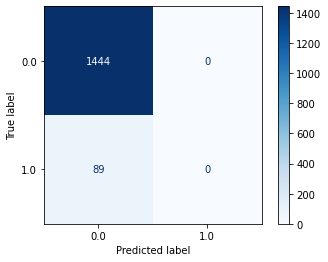

In [ ]:
#mulai melakukan modelling. model ML learning dari training set 
model=LogisticRegression()
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

In [ ]:
model.coef_

array([[-0.01926181,  1.5514967 ,  0.10348619,  0.07940788, -0.18090425,
        -0.06958962,  0.05980281,  0.1976799 , -0.03397277,  0.02276299]])

In [ ]:
model.intercept_

array([-4.04479423])

## K-Nearest Neighbour

Accuracy  0.9419439008480104
Precision  0.4709719504240052
Recall  0.5
Confusion matrix  [[1444    0]
 [  89    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


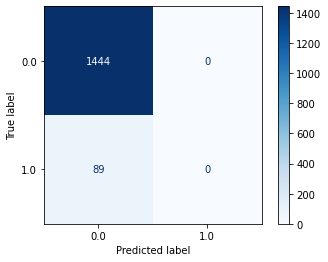

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

## Decision Tree

Accuracy  0.903457273320287
Precision  0.5410417304356698
Recall  0.5375595256621744
Confusion matrix  [[1374   70]
 [  78   11]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


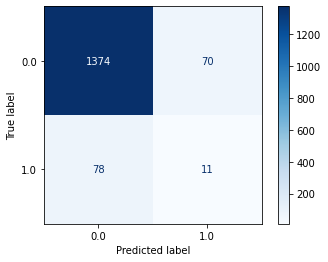

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

## Random Forest

Accuracy  0.9406392694063926
Precision  0.47093403004572176
Recall  0.49930747922437674
Confusion matrix  [[1442    2]
 [  89    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


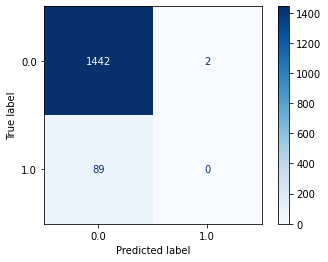

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

## AdaBoost

Accuracy  0.9386823222439661
Precision  0.5825678040244969
Recall  0.5088121323414984
Confusion matrix  [[1437    7]
 [  87    2]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


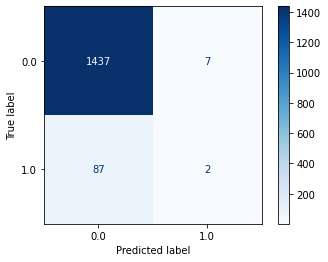

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model=AdaBoostClassifier()
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

## Support Vector Machine (SVM)

Accuracy  0.9419439008480104
Precision  0.4709719504240052
Recall  0.5
Confusion matrix  [[1444    0]
 [  89    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


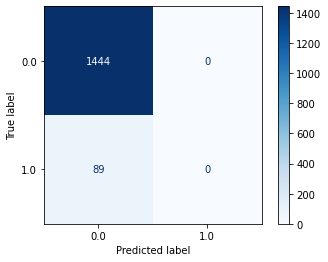

In [ ]:
from sklearn.svm import SVC

model=SVC()
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

## MLP for Binary Classification

### One vs Rest

Accuracy  0.9419439008480104
Precision  0.4709719504240052
Recall  0.5
Confusion matrix  [[1444    0]
 [  89    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


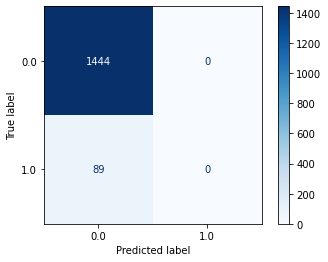

In [ ]:
#mulai melakukan modelling. model ML learning dari training set 
model=SVC(decision_function_shape='ovr')
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

### One vs One

Accuracy  0.9419439008480104
Precision  0.4709719504240052
Recall  0.5
Confusion matrix  [[1444    0]
 [  89    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


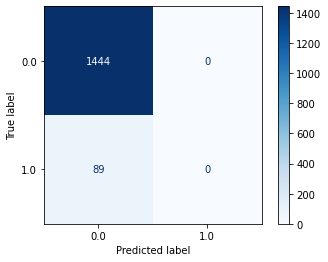

In [ ]:
#mulai melakukan modelling. model ML learning dari training set 
model=SVC(decision_function_shape='ovo')
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

# Regression
---

**Contents:**
- Regression
  - Linear Regression
  - Lasso
  - Ridge
  - Decision Tree Regression
- Random Forest Regression


In [ ]:
df_reg = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/kc_house_data.csv', delimiter=',')
df_reg.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

df_X = df_reg.drop(['id', 'date','price'], axis=1)
df_y = df_reg['price']

X = df_X.astype(float).values
y = df_y.astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#scaling di sini

reg = LinearRegression()
reg.fit(X_train, y_train)

print('coef of determination training ', reg.score(X_train, y_train))
print('coef of determination testing ', reg.score(X_test, y_test))

print('coefficient')
print(reg.coef_)
print('intercept')
print(reg.intercept_)

print('prediction')
y_pred = reg.predict(X_test)
print(y_pred[:10])
print('real value')
print(y_test[0:10])


coef of determination training  0.6995155846436758
coef of determination testing  0.6994627057969931
coefficient
[-3.43081477e+04  4.03129700e+04  1.12001375e+02  9.91841247e-02
  5.27154218e+03  5.43877177e+05  5.50830616e+04  2.31460673e+04
  9.49081794e+04  7.22190668e+01  3.97823082e+01 -2.59441847e+03
  2.19209734e+01 -5.56358731e+02  5.95216324e+05 -1.96904658e+05
  1.62077488e+01 -3.30430480e-01]
intercept
6641646.708106328
prediction
[ 458597.06764156  748993.75994812 1243303.7579907  1665116.95095485
  737302.05741749  283239.58524965  831732.87582315  495383.02095345
  385779.81919032  474179.42285123]
real value
[ 365000.  865000. 1038000. 1490000.  711000.  211000.  790000.  680000.
  384500.  605000.]


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import scipy.stats

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
r = scipy.stats.pearsonr(y_test,y_pred)

print('rmse : ', rmse)
print('r2 :', r2)
print('r :', r[0])

rmse :  208296.72772118772
r2 : 0.6994627057969931
r : 0.8365420533514896


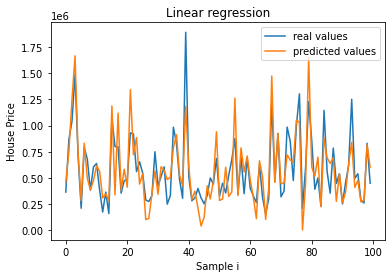

In [ ]:
sns.lineplot(data=y_test[:100],label='real values')
sns.lineplot(data=y_pred[:100],label='predicted values')
plt.title("Linear regression")
plt.xlabel('Sample i') 
plt.ylabel('House Price') 
plt.show()

## Lasso

In [ ]:
from sklearn.linear_model import Lasso

df_X = df_reg.drop(['id', 'date','price'], axis=1)
df_y = df_reg['price']

X = df_X.astype(float).values
y = df_y.astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
las = Lasso(alpha=0.5)
las.fit(X_train, y_train)

print('coef of determination training ', las.score(X_train, y_train))
print('coef of determination testing ', las.score(X_test, y_test))

print('coefficient')
print(las.coef_)
print('intercept')
print(las.intercept_)

print('prediction')
y_pred = las.predict(X_test)
print(y_pred[:10])
print('real value')
print(y_test[0:10])

coef of determination training  0.6995155840368914
coef of determination testing  0.6994610128651573
coefficient
[-3.43076850e+04  4.03114120e+04  2.84911657e+02  9.91632259e-02
  5.27123079e+03  5.43797338e+05  5.50856199e+04  2.31442635e+04
  9.49094340e+04 -1.00690981e+02 -1.33125080e+02 -2.59448802e+03
  2.19215887e+01 -5.56289851e+02  5.95183981e+05 -1.96858621e+05
  1.62061133e+01 -3.30453373e-01]
intercept
6642194.014812021
prediction
[ 458599.02700705  748987.81240725 1243307.2686813  1665112.63804505
  737301.38730388  283243.81761958  831725.9107284   495376.3539486
  385782.22242161  474176.56791352]
real value
[ 365000.  865000. 1038000. 1490000.  711000.  211000.  790000.  680000.
  384500.  605000.]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.696e+14, tolerance: 1.977e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print('rmse : ', rmse)
print('r2 :', r2)

rmse :  208297.31438991716
r2 : 0.6994610128651573


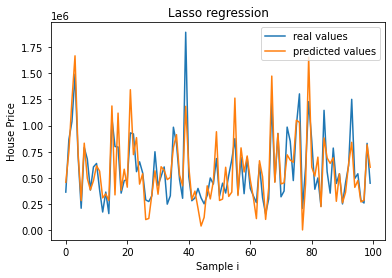

In [ ]:
sns.lineplot(data=y_test[:100],label='real values')
sns.lineplot(data=y_pred[:100],label='predicted values')
plt.title("Lasso regression")
plt.xlabel('Sample i') 
plt.ylabel('House Price') 
plt.show()

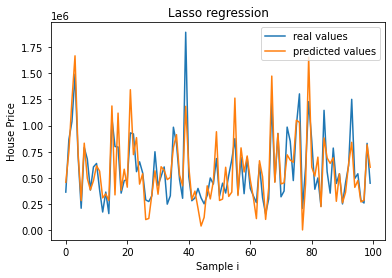

In [ ]:
sns.lineplot(data=y_test[:100],label='real values')
sns.lineplot(data=y_pred[:100],label='predicted values')
plt.title("Lasso regression")
plt.xlabel('Sample i') 
plt.ylabel('House Price') 
plt.show()

## Ridge

In [ ]:
from sklearn.linear_model import Ridge

df_X = df_reg.drop(['id', 'date','price'], axis=1)
df_y = df_reg['price']

X = df_X.astype(float).values
y = df_y.astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
ri = Lasso(alpha=0.9)
ri.fit(X_train, y_train)

print('coef of determination training ', ri.score(X_train, y_train))
print('coef of determination testing ', ri.score(X_test, y_test))

print('coefficient')
print(ri.coef_)
print('intercept')
print(ri.intercept_)

print('prediction')
y_pred = ri.predict(X_test)
print(y_pred[:10])
print('real value')
print(y_test[0:10])

coef of determination training  0.6995155826776935
coef of determination testing  0.6994596576369887
coefficient
[-3.43073148e+04  4.03101657e+04  2.84911706e+02  9.91465069e-02
  5.27098168e+03  5.43733467e+05  5.50876665e+04  2.31428204e+04
  9.49104377e+04 -1.00690842e+02 -1.33122813e+02 -2.59454365e+03
  2.19220809e+01 -5.56234746e+02  5.95158107e+05 -1.96821791e+05
  1.62048049e+01 -3.30471688e-01]
intercept
6642631.86018117
prediction
[ 458600.59449927  748983.05437433 1243310.07723367 1665109.18771725
  737300.85121291  283247.20351533  831720.33865245  495371.02034458
  385784.14500657  474174.28396314]
real value
[ 365000.  865000. 1038000. 1490000.  711000.  211000.  790000.  680000.
  384500.  605000.]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.696e+14, tolerance: 1.977e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print('rmse : ', rmse)
print('r2 :', r2)

rmse :  208297.7840296008
r2 : 0.6994596576369887


## Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

df_X = df_reg.drop(['id', 'date','price'], axis=1)
df_y = df_reg['price']

X = df_X.astype(float).values
y = df_y.astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dt = DecisionTreeRegressor(max_depth=10)
dt.fit(X_train, y_train)

print('coef of determination training ',dt.score(X_train, y_train))
print('coef of determination testing ',dt.score(X_test, y_test))

print('prediction')
y_pred = dt.predict(X_test)
print(y_pred[:10])
print('real value')
print(y_test[0:10])

coef of determination training  0.9185274272472612
coef of determination testing  0.7611413632179289
prediction
[ 372512.5         837693.06862745 1087247.96153846 1984617.64705882
  656314.08658009  237079.87179487  849106.21276596  517991.26363636
  366270.875       519039.40166667]
real value
[ 365000.  865000. 1038000. 1490000.  711000.  211000.  790000.  680000.
  384500.  605000.]


In [ ]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print('rmse : ', rmse)
print('r2 :', r2)

rmse :  185696.50759772558
r2 : 0.7611413632179289


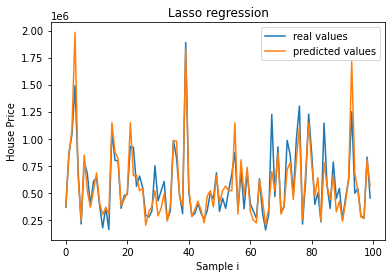

In [ ]:
sns.lineplot(data=y_test[:100],label='real values')
sns.lineplot(data=y_pred[:100],label='predicted values')
plt.title("Lasso regression")
plt.xlabel('Sample i') 
plt.ylabel('House Price') 
plt.show()

## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

df_X = df_reg.drop(['id', 'date','price'], axis=1)
df_y = df_reg['price']

X = df_X.astype(float).values
y = df_y.astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

print('coef of determination training ', rf.score(X_train, y_train))
print('coef of determination testing ', rf.score(X_test, y_test))

print('prediction')
y_pred = rf.predict(X_test)
print(y_pred[:10])
print('real value')
print(y_test[0:10])

coef of determination training  0.9821085529641098
coef of determination testing  0.8523519499180573
prediction
[ 383293.55        870845.18       1121593.2        2077873.
  704537.41666667  249206.63        847472.5         628979.04
  402972.31        551510.2       ]
real value
[ 365000.  865000. 1038000. 1490000.  711000.  211000.  790000.  680000.
  384500.  605000.]


# Neural Network 
---

**Contents:**
- Classification
  - Check Presentase Target Class
  - Check Missing Values
  - Check Categorical Attributes
- Regression
  - Check Missing Values
  - Check Categorical Attributes
  - MLP for Regression

## Classification

In [ ]:
df_ann = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/BankChurners.csv', delimiter=',')
df_ann.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
df_ann.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


### Check Persentase Target Class

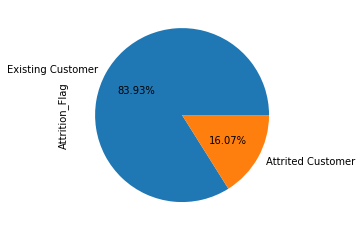

In [ ]:
data = df_ann['Attrition_Flag'].value_counts()
data.plot(kind='pie',autopct='%.2f%%')
plt.show() 

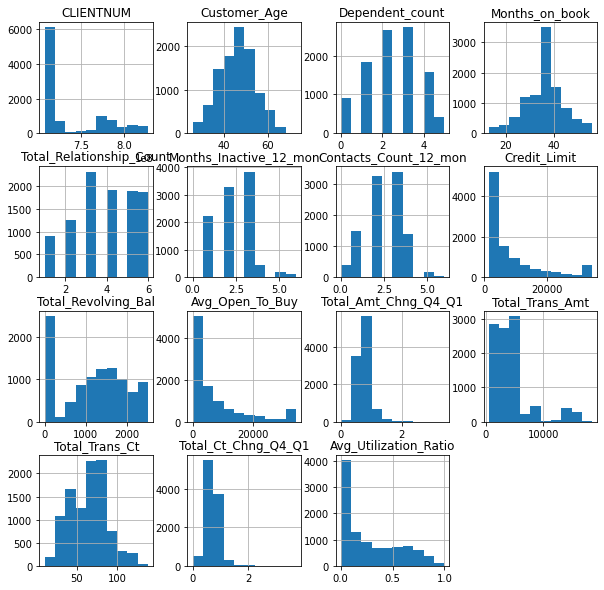

In [ ]:
df_ann.hist(figsize=(10,10))
plt.show()

### Check Missing Values

In [ ]:
df_ann.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

### Check Categorical Attributes

In [ ]:
df_X = df_ann.drop(['CLIENTNUM',	'Attrition_Flag'],axis=1)
df_y = df_ann[['Attrition_Flag']]
cats = df_X.select_dtypes(include=['object', 'bool']).columns
print(cats)

Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')


              precision    recall  f1-score   support

           0      0.787     0.802     0.794       496
           1      0.961     0.958     0.959      2543

    accuracy                          0.932      3039
   macro avg      0.874     0.880     0.877      3039
weighted avg      0.933     0.932     0.932      3039

Accuracy  0.9322145442579796
Precision  0.9613106987761547
Recall  0.9575304758159654
Confusion matrix  [[ 398   98]
 [ 108 2435]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


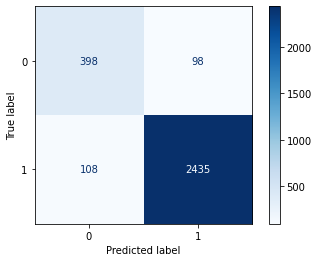

In [ ]:
# get X and y
df_X = df_ann.drop(['CLIENTNUM',	'Attrition_Flag'],axis=1)
df_y = df_ann[['Attrition_Flag']]

#hold out, dibagi menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.3, random_state=42)

#label encoding for y
le = LabelEncoder()
le.fit(y_train['Attrition_Flag'])
y_train=le.transform(y_train['Attrition_Flag'])
y_test=le.fit_transform(y_test['Attrition_Flag'])
#buat dataframe baru
X_train_enc, X_train_sc = X_train.copy(), X_train.copy()
X_test_enc, X_test_sc = X_test.copy(), X_train.copy()
#categorical encoding
cats = X_train.select_dtypes(include=['object', 'bool']).columns
cat_features = list(cats.values)
cat_en = OrdinalEncoder()
for i in cat_features:
  cat_en.fit(X_train[i].values.reshape(-1, 1))
  X_train_enc[i] = cat_en.transform(X_train[i].values.reshape(-1, 1))
  X_test_enc[i] = cat_en.transform(X_test[i].values.reshape(-1, 1))

#scaling
scaler = StandardScaler().fit(X_train_enc)
X_train_sc = scaler.transform(X_train_enc)
X_test_sc = scaler.transform(X_test_enc)

#mulai learning 
model=MLPClassifier(max_iter=1000)

#model=MLPClassifier(max_iter=1000, random_state=42, activation='logistic')
model.fit(X_train_sc, y_train)

y_pred = model.predict(X_test_sc)
print(classification_report(y_test, y_pred, digits=3))
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred))  
print('Recall ',recall_score(y_test, y_pred)) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test_sc, y_test, cmap=plt.cm.Blues)  
plt.show()

In [ ]:
data = [{'Customer_Age':68, 'Gender':'F', 'Dependent_count':5, 'Education_Level':'Graduate', 
         'Marital_Status':'Single', 'Income_Category':'Less than $40K', 'Card_Category':'Blue',
         'Months_on_book':44, 'Total_Relationship_Count':6, 'Months_Inactive_12_mon':1, 
         'Contacts_Count_12_mon':2, 'Credit_Limit':8700,'Total_Revolving_Bal':800, 'Avg_Open_To_Buy':7392,
         'Total_Amt_Chng_Q4_Q1':1.541,'Total_Trans_Amt':1200,'Total_Trans_Ct':33,'Total_Ct_Chng_Q4_Q1':3.714,
         'Avg_Utilization_Ratio':0.10},
        {'Customer_Age':68, 'Gender':'F', 'Dependent_count':1, 'Education_Level':'High School', 
         'Marital_Status':'Single', 'Income_Category':'Less than $40K', 'Card_Category':'Blue',
         'Months_on_book':36, 'Total_Relationship_Count':5, 'Months_Inactive_12_mon':3, 
         'Contacts_Count_12_mon':4, 'Credit_Limit':5700,'Total_Revolving_Bal':0, 'Avg_Open_To_Buy':5700,
         'Total_Amt_Chng_Q4_Q1':0.541,'Total_Trans_Amt':12000,'Total_Trans_Ct':60,'Total_Ct_Chng_Q4_Q1':0.714,
         'Avg_Utilization_Ratio':0}]

df_input = pd.DataFrame(data)

#categorical encoding
cats = df_X.select_dtypes(include=['object', 'bool']).columns
cat_features = list(cats.values)
for i in cat_features:
  cat_en.fit(X_train[i].values.reshape(-1, 1))
  df_input[i] = cat_en.transform(df_input[i].values.reshape(-1, 1))

#scaling
df_input= scaler.transform(df_input)

result= model.predict(df_input)
for i in result:
  int_result = int(i)
  if (int_result == 0):
    decision = 'Existing Customer'
  elif (int_result==1):
    decision = 'Attrited Customer'
  else:
    decison = 'Not defined'
  print('Result prediction is ', decision)

Result prediction is  Attrited Customer
Result prediction is  Existing Customer


## Regression 

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/kc_house_data.csv', delimiter=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Check Missing Values

In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

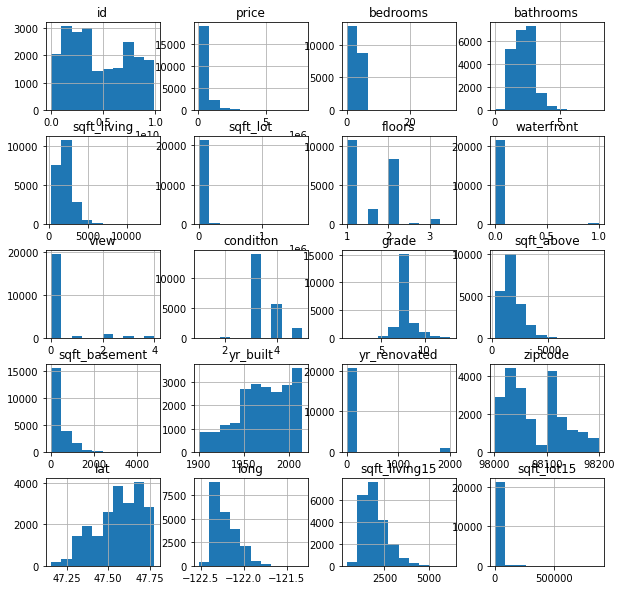

In [ ]:
df.hist(figsize=(10,10))
plt.show()

### Check Categorical Attributes

In [ ]:
df_X = df.drop(['id','date','price'],axis=1)
df_y = df[['price']]
cats = df_X.select_dtypes(include=['object', 'bool']).columns
print(cats)

Index([], dtype='object')


### MLP for regression

In [ ]:
from sklearn.neural_network import MLPRegressor

df_X = df.drop(['id', 'date','price'], axis=1)
df_y = df['price']

X = df_X.astype(float).values
y = df_y.astype(float).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg = MLPRegressor()
reg.fit(X_train, y_train)

print('coef of determination training ',reg.score(X_train, y_train))
print('coef of determination testing ',reg.score(X_test, y_test))

print('prediction')
y_pred = reg.predict(X_test)
print(y_pred[:10])
print('real value')
print(y_test[0:10])

coef of determination training  0.5702622647734388
coef of determination testing  0.5536241494475892
prediction
[ 476891.12865437  706595.10673236 1098887.30228235 1387428.93902771
  611499.1070061   383162.57730094  620684.22412453  508186.85727372
  465779.56950941  354878.39047017]
real value
[ 365000.  865000. 1038000. 1490000.  711000.  211000.  790000.  680000.
  384500.  605000.]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

print('rmse : ', rmse)
print('r2 :', r2)

rmse :  253853.76367604933
r2 : 0.5536241494475892


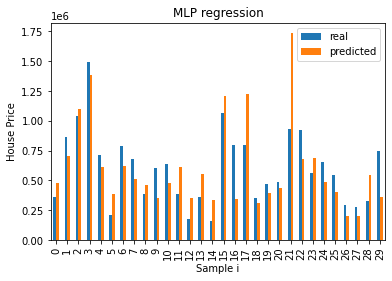

In [ ]:
data1 = pd.DataFrame(y_test[:30], columns = ['real'])
data2 = pd.DataFrame(y_pred[:30], columns = ['predicted'])
df_new = pd.concat([data1, data2], axis=1) 
df_new.plot(kind='bar') 

plt.title("MLP regression")
plt.xlabel('Sample i') 
plt.ylabel('House Price') 

plt.show()

# Evaluation Metrics & Hyperparameter Tuning

---

**Contents:**

- Evaluation metrics
  - Confusion Matrix
  - Accuracy
  - Precision, Recall & F1-Score
  - ROC Curve
  - Mean Absolute Error, Mean Squared Error, R2 Score
- Hyperparameter Tuning
  - Cross Validation
  - GridSearchCV

## Classification Case

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/diabetes.csv")
print(data.shape)
data.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Exploratory Data Analysis

In [ ]:
# target variable
data['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

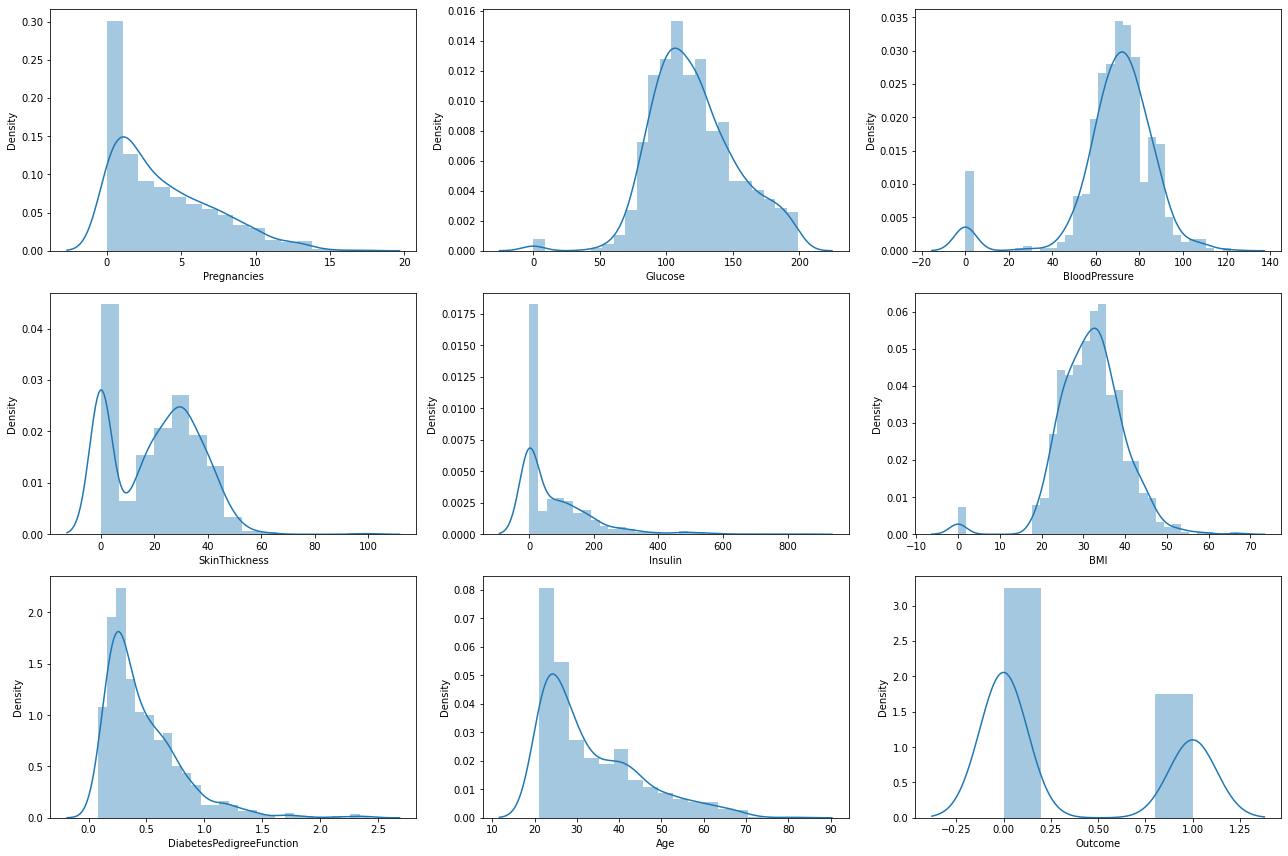

In [ ]:
# univariate analysis
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

fig, axes = plt.subplots(3,3, figsize=(18,12))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(columns):
  plot = sns.distplot(data[col], ax=axes[i])

plt.tight_layout()

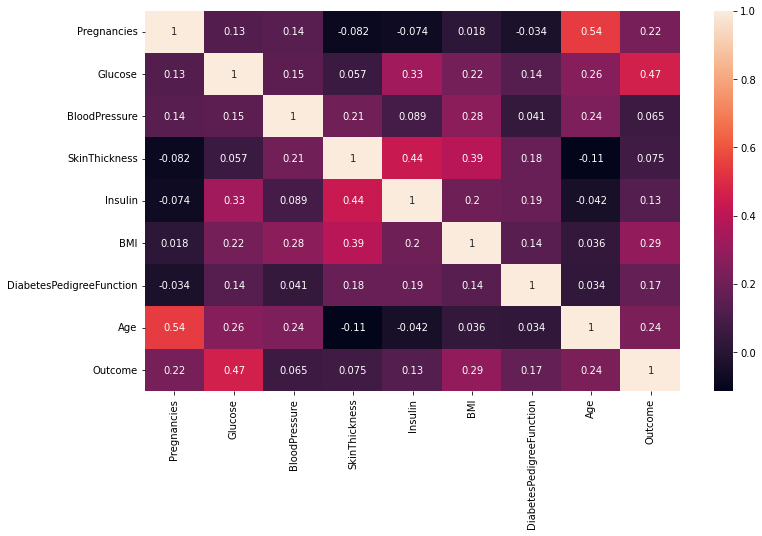

In [ ]:
# correlation
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(), annot=True)
plt.show()

### Modelling & Evaluation

In [ ]:
# Show the evaluation metrics using confusion matrix
def confusion(y_true, preds):
  """
  y_true - the y values that are actually true in the dataset (numpy array or pandas series)
  preds - the predictions for those values from some model (numpy array or pandas series)
  """

  tp, fp, fn, tn = confusion_matrix(y_true, preds).ravel()
  print(confusion_matrix(y_true, preds))
  print('')

  print("True Positive: ", format(tp))
  print("False Positive: ", format(fp))
  print("True Negative: ", format(tn))
  print("False Negative: ", format(fn))

In [ ]:
# Show the evaluation metrics
def evaluation_metrics(y_true, preds, model_name=None):
  """
  y_true - the y values that are actually true in the dataset (numpy array or pandas series)
  preds - the predictions for those values from some model (numpy array or pandas series)
  model_name - (str - optional) a name associated with the model if you would like to add it to the print statements  
  """

  if model_name == None:
    print('Accuracy score: ', format(round(accuracy_score(y_true, preds),4)))
    print('Precision score: ', format(round(precision_score(y_true, preds),4)))
    print('Recall score: ', format(round(recall_score(y_true, preds),4)))
    print('F1 score: ', format(round(f1_score(y_true, preds),4)))

  else:
    print('Accuracy score for ' + model_name + ' :' , format(round(accuracy_score(y_true, preds),4)))
    print('Precision score ' + model_name + ' :', format(round(precision_score(y_true, preds),4)))
    print('Recall score ' + model_name + ' :', format(round(recall_score(y_true, preds),4)))
    print('F1 score ' + model_name + ' :', format(round(f1_score(y_true, preds),4)))

In [ ]:
# separating the data
X = data.drop(columns='Outcome')
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Simple machine learning model
clf_rf = RandomForestClassifier()

# Fit the model on the training data
clf_rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf_rf.predict(X_test)

In [ ]:
# confusion matrix
confusion(y_test, y_pred)

[[136  16]
 [ 35  44]]

True Positive:  136
False Positive:  16
True Negative:  44
False Negative:  35


In [ ]:
# accuracy, precision, recall and f1-score
evaluation_metrics(y_test, y_pred, model_name="Random Forest")

Accuracy score for Random Forest : 0.7792
Precision score Random Forest : 0.7333
Recall score Random Forest : 0.557
F1 score Random Forest : 0.6331


In [ ]:
# Evaluation metrics using ROC curve
def roc_curve_plot(y_test, y_preds):
    '''
    INPUT:
    stuff 
    OUTPUT:
    auc - returns auc as a float
    prints the roc curve
    '''
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(y_test)):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_preds[:, 1])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_preds[:, 1].ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.plot(fpr[2], tpr[2], color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.show()
    
    return roc_auc_score(y_test, np.round(y_preds[:, 1]))

In [ ]:
y_prob = clf_rf.predict_proba(X_test)

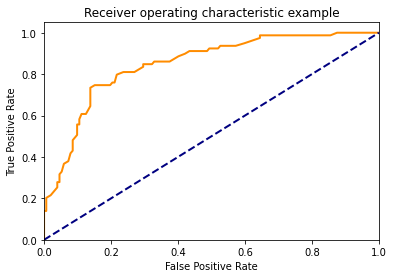

0.7258494337108594

In [ ]:
roc_curve_plot(y_test, y_prob)